# Model Comparison - All Three Models

This notebook compares the three models built in this assignment:
1. Logistic Regression (Classification)
2. Linear Regression (Regression)
3. K-Means Clustering (Unsupervised)


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, roc_auc_score,
                             mean_squared_error, r2_score,
                             silhouette_score, classification_report)
import os

os.makedirs("../figures", exist_ok=True)


In [26]:
df = pd.read_csv("../data/processed/telco_cleaned_encoded.csv")
print("Dataset loaded:", df.shape)


Dataset loaded: (7032, 41)


## Re-run All Three Models

In [27]:
X_clf = df.drop(columns=["Churn"])
y_clf = df["Churn"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

scaler_c = StandardScaler()
X_train_cs = scaler_c.fit_transform(X_train_c)
X_test_cs  = scaler_c.transform(X_test_c)

lr_clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
lr_clf.fit(X_train_cs, y_train_c)

y_pred_clf  = lr_clf.predict(X_test_cs)
y_proba_clf = lr_clf.predict_proba(X_test_cs)[:, 1]

lr_accuracy = accuracy_score(y_test_c, y_pred_clf)
lr_auc      = roc_auc_score(y_test_c, y_proba_clf)

print("=== Logistic Regression ===")
print(f"Accuracy : {lr_accuracy:.4f}")
print(f"AUC      : {lr_auc:.4f}")
print(classification_report(y_test_c, y_pred_clf))


=== Logistic Regression ===
Accuracy : 0.7257
AUC      : 0.8350
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [28]:
X_reg = df.drop(columns=["MonthlyCharges", "Churn"])
y_reg = df["MonthlyCharges"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_r = StandardScaler()
X_train_rs = scaler_r.fit_transform(X_train_r)
X_test_rs  = scaler_r.transform(X_test_r)

lr_reg = LinearRegression()
lr_reg.fit(X_train_rs, y_train_r)

y_pred_reg = lr_reg.predict(X_test_rs)
reg_rmse   = np.sqrt(mean_squared_error(y_test_r, y_pred_reg))
reg_r2     = r2_score(y_test_r, y_pred_reg)

print("=== Linear Regression ===")
print(f"R²   : {reg_r2:.4f}")
print(f"RMSE : {reg_rmse:.4f}")


=== Linear Regression ===
R²   : 0.9987
RMSE : 1.0777


In [29]:
features = ["tenure", "MonthlyCharges", "TotalCharges",
            "SeniorCitizen", "Partner", "Dependents",
            "PhoneService", "PaperlessBilling"]

X_km = df[features]
scaler_k = StandardScaler()
X_km_scaled = scaler_k.fit_transform(X_km)

km = KMeans(n_clusters=4, random_state=42, n_init=10)
km_labels = km.fit_predict(X_km_scaled)

km_sil = silhouette_score(X_km_scaled, km_labels)

print("=== K-Means Clustering ===")
print(f"Silhouette Score : {km_sil:.4f}")
print("Cluster sizes:\n", pd.Series(km_labels).value_counts().sort_index())


=== K-Means Clustering ===
Silhouette Score : 0.2611
Cluster sizes:
 0    1472
1    1978
2     680
3    2902
Name: count, dtype: int64


## Comparison Table


In [30]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression (Classification)",
        "Linear Regression (Regression)",
        "K-Means Clustering (Unsupervised)"
    ],
    "Task Type": [
        "Supervised - Classification",
        "Supervised - Regression",
        "Unsupervised - Clustering"
    ],
    "Key Metric": ["Accuracy / AUC", "R² / RMSE", "Silhouette Score"],
    "Score": [
        f"Acc={lr_accuracy:.3f}, AUC={lr_auc:.3f}",
        f"R²={reg_r2:.3f}, RMSE={reg_rmse:.3f}",
        f"Silhouette={km_sil:.3f}"
    ],
    "Target Variable": [
        "Churn (binary 0/1)",
        "MonthlyCharges (continuous)",
        "None (finds natural groups)"
    ]
})

print(comparison.to_string(index=False))


                               Model                   Task Type       Key Metric                Score             Target Variable
Logistic Regression (Classification) Supervised - Classification   Accuracy / AUC Acc=0.726, AUC=0.835          Churn (binary 0/1)
      Linear Regression (Regression)     Supervised - Regression        R² / RMSE R²=0.999, RMSE=1.078 MonthlyCharges (continuous)
   K-Means Clustering (Unsupervised)   Unsupervised - Clustering Silhouette Score     Silhouette=0.261 None (finds natural groups)


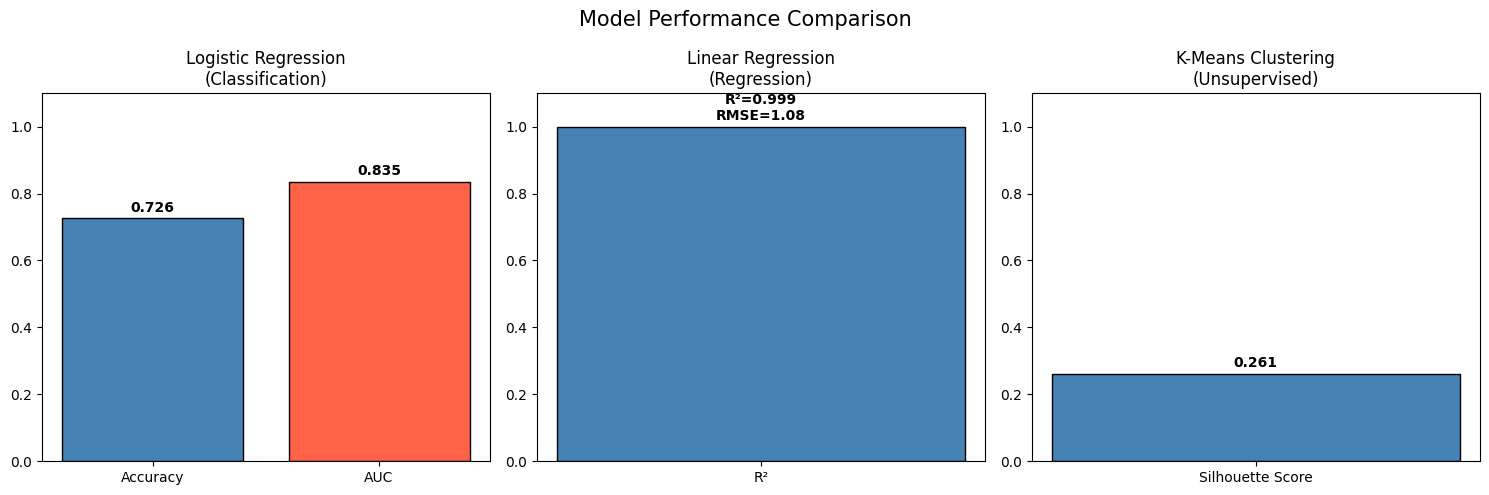

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(["Accuracy", "AUC"], [lr_accuracy, lr_auc],
            color=["steelblue", "tomato"], edgecolor="black")
axes[0].set_title("Logistic Regression\n(Classification)")
axes[0].set_ylim(0, 1.1)
for i, v in enumerate([lr_accuracy, lr_auc]):
    axes[0].text(i, v + 0.02, f"{v:.3f}", ha="center", fontweight="bold")

axes[1].bar(["R²"], [reg_r2], color=["steelblue"], edgecolor="black")
axes[1].set_title("Linear Regression\n(Regression)")
axes[1].set_ylim(0, 1.1)
axes[1].text(0, reg_r2 + 0.02, f"R²={reg_r2:.3f}\nRMSE={reg_rmse:.2f}",
             ha="center", fontweight="bold")

axes[2].bar(["Silhouette Score"], [km_sil], color=["steelblue"], edgecolor="black")
axes[2].set_title("K-Means Clustering\n(Unsupervised)")
axes[2].set_ylim(0, 1.1)
axes[2].text(0, km_sil + 0.02, f"{km_sil:.3f}", ha="center", fontweight="bold")

plt.suptitle("Model Performance Comparison", fontsize=15)
plt.tight_layout()
plt.savefig("../figures/18_model_comparison.png")
plt.show()


## Discussion

### Logistic Regression (Classification)
Logistic Regression is a supervised model that predicts whether a customer
will churn (1) or not (0). It is the most directly useful model for churn
prediction because it is trained on the labelled Churn column.
The `class_weight='balanced'` parameter was used to handle the class imbalance
(~73.5% No Churn vs ~26.5% Churn). A high AUC score indicates the model
is good at ranking churners above non-churners.

### Linear Regression (Regression)
Linear Regression is a supervised model used to predict a continuous value.
Here it predicts MonthlyCharges based on customer features. A high R² score
means the model explains most of the variation in monthly charges. This is
useful for revenue forecasting and understanding which services drive charges.
It is evaluated using RMSE and R², not accuracy.

### K-Means Clustering (Unsupervised)
K-Means groups customers into segments without using the Churn label at all.
It reveals natural patterns in the data. A silhouette score closer to 1 means
the clusters are well separated. By examining which cluster has the highest
churn rate, the business can identify the most at-risk customer segment.

### Summary
Logistic Regression is best for directly predicting churn.
K-Means is best for customer segmentation and understanding behaviour patterns.
Linear Regression is best for predicting continuous outcomes like revenue.
All three models together give a complete view of the customer churn problem.


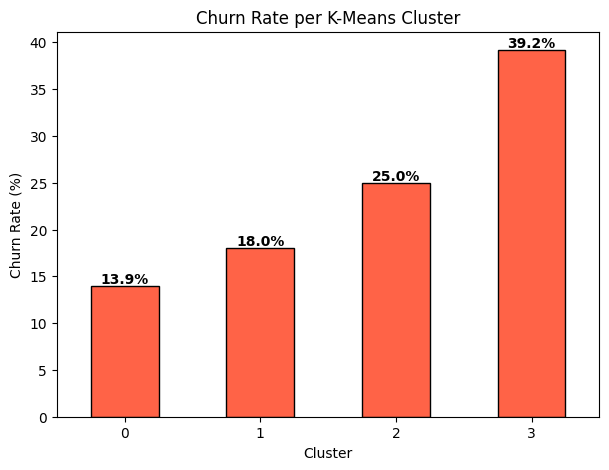

Cluster with highest churn risk: 3


In [32]:
df_cluster = df.copy()
df_cluster["Cluster"] = km_labels

churn_by_cluster = df_cluster.groupby("Cluster")["Churn"].mean() * 100

churn_by_cluster.plot(kind="bar", color="tomato", edgecolor="black", figsize=(7, 5))
plt.title("Churn Rate per K-Means Cluster")
plt.xlabel("Cluster")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)

for i, val in enumerate(churn_by_cluster):
    plt.text(i, val + 0.3, f"{val:.1f}%", ha="center", fontweight="bold")

plt.savefig("../figures/19_churn_rate_by_cluster_comparison.png")
plt.show()

print("Cluster with highest churn risk:", churn_by_cluster.idxmax())


## References

- IBM (2019) *Telco Customer Churn Dataset*. Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn (Accessed: February 2026).
- Géron, A. (2019) *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. 2nd edn. O'Reilly Media.
- He, H. and Garcia, E.A. (2009) 'Learning from imbalanced data', *IEEE Transactions on Knowledge and Data Engineering*, 21(9), pp. 1263–1284.
- Neslin, S.A. et al. (2006) 'Defection detection: Measuring and understanding the predictive accuracy of customer churn models', *Journal of Marketing Research*, 43(2), pp. 204–211.
- Pedregosa, F. et al. (2011) 'Scikit-learn: Machine learning in Python', *Journal of Machine Learning Research*, 12, pp. 2825–2830.
- Verbeke, W. et al. (2012) 'New insights into churn prediction in the telecommunication sector', *European Journal of Operational Research*, 218(1), pp. 211–229.
